In [331]:
# Codice per clonare la repository di github con tutti i dati. Va eseguito una sola volta
# (per questo si controlla se la cartella esista già o meno)
# È stato scelto questo metodo per permettere a tutti, sia da google colab che in locale,
# di avere i dati a disposizione

# Se si esegue in locale, assicurarsi di avere git installato
# Al link della repository sono visionabili tutti i file
from os import path
if not path.exists("Laboratorio_Fisica_3"):
    !git clone https://github.com/MasterRoby3/Laboratorio_Fisica_3

# Per comodità si definisce una variabile che sia la radice di tutti i percorsi utilizzati, in modo da alleggerire il codice successivo
rad = "Laboratorio_Fisica_3/Caratterizzazione_elettrica_ottica/"

# In questa prima cella si importano anche le librerie necessarie:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt
import pandas as pd

# Si memorizzano anche alcune costanti utili più avanti
electron_charge = scc.e
Boltzmann = scc.Boltzmann
temperature = 300

#Altri dati utili per i plot
titlefontsize, labelfontsize, tickfontsize=20, 16, 14
markersize, linewidth = 6, 1

# Caratterizzazione elettrica e ottica dei LED

## Parte 1: caratterizzazione elettrica
In questa parte dell'esperienza lo scopo è verificare la caratterizzazione elettrica di varie giunzioni p-n, cioè la relazione corrente - tensione:
$$I = I_0 \left(e^{\frac{qV}{kT}} - 1\right)$$

Il circuito utilizzato è rappresentato di seguito:

<br><center><img src="Laboratorio_Fisica_3/Caratterizzazione_elettrica_ottica/img/Caratterizzazione_elettrica.png"/></center><br>

Si utilizzano quindi l'amperometro e il voltmetro per misurare varie coppie di valori I - V per i led rosso, giallo, verde, blu, bianco e infrarosso e per un fotodiodo.

Di seguito vengono riportati i plot relativi alla caratterizzazione elettrica.

In [332]:
data = pd.read_csv(rad + "data/car_elettrica.csv")

print("Dataframe da csv: ")
print(data)
headers = data.keys()

# Creo gli array numpy per l'analisi successiva
I = data['I'].to_numpy()
V_red = data['V_red'].to_numpy()
V_yellow = data['V_yellow'].to_numpy()
V_green = data['V_green'].to_numpy()
V_blue = data['V_blue'].to_numpy()
V_white = data['V_white'].to_numpy()
V_infr = data['V_infr'].to_numpy()
V_ph = data['V_ph'].to_numpy()

Dataframe da csv: 
         I  V_red  V_yellow  V_green  V_blue  V_white  V_infr   V_ph
0    0.001   1.33      1.53     2.14    2.16     2.33   1.040  0.294
1    0.005   1.41      1.59     2.24    2.29     2.40   1.110  0.338
2    0.010   1.45      1.62     2.28    2.34     2.42   1.140  0.360
3    0.020   1.48      1.64     2.33    2.38     2.45   1.160  0.385
4    0.040   1.51      1.67     2.37    2.42     2.47   1.180  0.410
5    0.060   1.53      1.69     2.40    2.45     2.49   1.200  0.425
6    0.080   1.54      1.70     2.42    2.47     2.50   1.210  0.437
7    0.100   1.56      1.71     2.43    2.48     2.51   1.210  0.446
8    0.200   1.58      1.75     2.49    2.53     2.54   1.230  0.477
9    0.400   1.61      1.79     2.55    2.58     2.57   1.250  0.506
10   0.600   1.63      1.82     2.59    2.62     2.59   1.260  0.525
11   0.800   1.64      1.84     2.62    2.64     2.60   1.270  0.538
12   1.000   1.65      1.86     2.64    2.67     2.62   1.280  0.548
13   1.500   1.

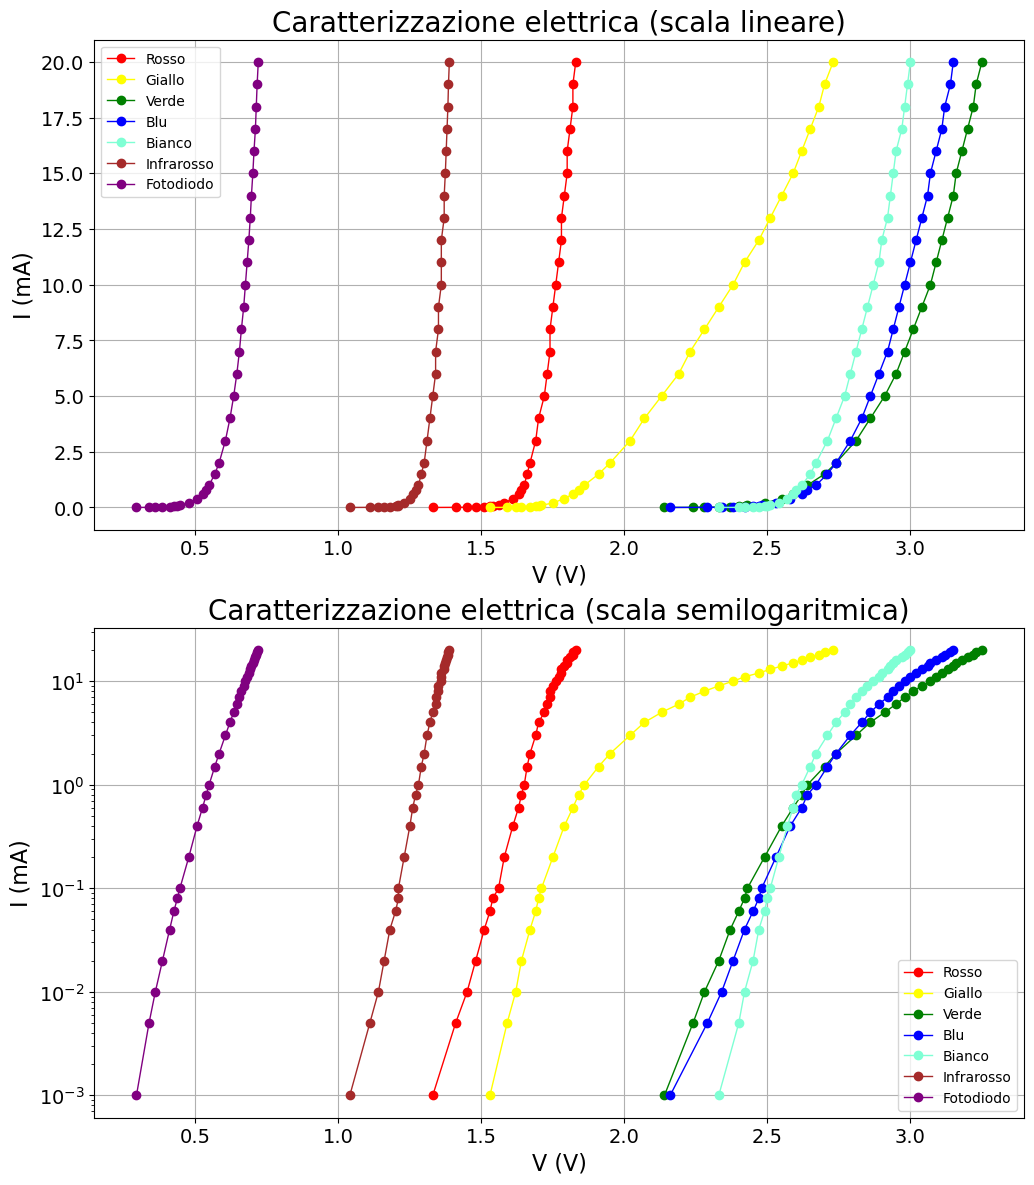

In [32]:
# In questa cella si procede al plot dei dati
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[12,14])

ax1.set_title('Caratterizzazione elettrica (scala lineare)', size=titlefontsize)
ax1.plot(V_red, I, '-o', markersize=markersize, linewidth=linewidth, color='red', label="Rosso")
ax1.plot(V_yellow, I, '-o', markersize=markersize, linewidth=linewidth, color='yellow', label="Giallo")
ax1.plot(V_green, I, '-o', markersize=markersize, linewidth=linewidth, color='green', label="Verde")
ax1.plot(V_blue, I, '-o', markersize=markersize, linewidth=linewidth, color='blue', label="Blu")
ax1.plot(V_white, I, '-o', markersize=markersize, linewidth=linewidth, color='aquamarine', label="Bianco")
ax1.plot(V_infr, I, '-o', markersize=markersize, linewidth=linewidth, color='brown', label="Infrarosso")
ax1.plot(V_ph, I, '-o', markersize=markersize, linewidth=linewidth, color='purple', label="Fotodiodo")
ax1.set_xlabel('V (V)', size=labelfontsize)
ax1.set_ylabel('I (mA)', size=labelfontsize)
ax1.tick_params(labelsize=tickfontsize)
ax1.grid(True)
ax1.legend()

ax2.set_yscale("log")
ax2.set_title('Caratterizzazione elettrica (scala semilogaritmica)', size=titlefontsize)
ax2.plot(V_red, I, '-o', markersize=markersize, linewidth=linewidth, color='red', label="Rosso")
ax2.plot(V_yellow, I, '-o', markersize=markersize, linewidth=linewidth, color='yellow', label="Giallo")
ax2.plot(V_green, I, '-o', markersize=markersize, linewidth=linewidth, color='green', label="Verde")
ax2.plot(V_blue, I, '-o', markersize=markersize, linewidth=linewidth, color='blue', label="Blu")
ax2.plot(V_white, I, '-o', markersize=markersize, linewidth=linewidth, color='aquamarine', label="Bianco")
ax2.plot(V_infr, I, '-o', markersize=markersize, linewidth=linewidth, color='brown', label="Infrarosso")
ax2.plot(V_ph, I, '-o', markersize=markersize, linewidth=linewidth, color='purple', label="Fotodiodo")
ax2.set_xlabel('V (V)', size=labelfontsize)
ax2.set_ylabel('I (mA)', size=labelfontsize)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

Come si vede chiaramente dai grafici riportati, il grafico non è perfettamente esponenziale, ma tende a un comportamento lineare all'aumentare della tensione. Per ottenere un valore corretto di $I_0$ dal fit che verrà effettuato su questi dati, è necessario isolare la parte esponenziale ed effettuare un fit su quei dati (ci si può aiutare usando il grafico in scala semilogaritmica, dato che bisogna considerare solo la parte ad andamento lineare). Si procede di seguito a effettuare i fit.

Dato che il fit di funzioni esponenziali può essere irregolare, si inverte la funzione fittando V in funzione di I. La funzione di fit (con parametri $I_0$ e $n$) sarà quindi:
$$V = \frac{nkT}{q} \ln\left(\frac{I}{I_0} + 1\right)$$
Notare inoltre che si è introdotto anche il fattore di idealità $n$: questo è fondamentale perché, trattandosi di LED non ideali, se non si considerasse $n$ il fit risulterebbe molto impreciso.

In [226]:
# Definizione del numero dei dati in cui le funzioni seguono il comportamento esponenziale, utili per effettuare i fit
# Ad ogni variabile viene assegnato il numero di dati da considerare
# Per l'infrarosso e il fotodiodo si assegna un valore pari al numero dei dati raccolti dato che sono con buona approssimazione esponenziali per tutti i valori misurati
# Si definisce un dizionario per comodità di utilizzo col codice successivo
exp_range_dict = {
    "red" : 18,
    "yellow" : 11,
    "green" : 11,
    "blue" : 12,
    "white" : 13,
    "infr" : len(V_infr),
    "ph" : len(V_ph)
}

# Si definisce qui la funzione di fit
def caratt_el(V, I_0, n):
    return I_0 * (np.exp( (electron_charge * V) / (n * Boltzmann * temperature)) - 1)

def inv(I, I_0, n):
    return ((n * Boltzmann * temperature) / electron_charge) * np.log(I/I_0 + 1)

# Funzione utile per il calcolo dell'R^2
def r_squared(actual, predicted):
    residuals = actual - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum( (actual - np.mean(actual))**2 )
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [237]:
#Si procede ora in questa cella a effettuare il fit dei dati e a plottare i risultati
# si effettua un ciclo e si salvano i risultati in ordine in un dizionario per snellire il codice
V_dict = {
    "red":V_red,
    "yellow":V_yellow,
    "green":V_green,
    "blue":V_blue,
    "white":V_white,
    "infr":V_infr,
    "ph":V_ph
}

# Questo dizionario contiene liste di 5 elementi per ogni led, che rappresentano rispettivamente il valore di I_0, la deviazione standard di I_0, il valore di n, la deviazione standard di n e l'R^2
# È necessario per salvare i parametri fittati e mostrare successivamente i risultati nei plot
results_dict = {
    "red":[0,0,0,0,0],
    "yellow":[0,0,0,0,0],
    "green":[0,0,0,0,0],
    "blue":[0,0,0,0,0],
    "white":[0,0,0,0,0],
    "infr":[0,0,0,0,0],
    "ph":[0,0,0,0,0]
}

for key, V in V_dict.items():
    # Si restringono i dati alla sola parte con comportamento esponenziale in accordo con quanto definito sopra
    V = V[:exp_range_dict[key]]
    # Anche i dati della corrente vanno ristretti in base al numero di dati della tensione utilizzati
    I_res = I[:exp_range_dict[key]]
    ndata = len(V)

    # Si divide la corrente per 1000 perché è misurata in milli-Ampere, ma nella funzione di fit le costanti sono del sistema internazionale
    # In questo caso per il fit si utilizza una guess per agevolare il processo di ottimizzazione
    popt, pcov=sop.curve_fit(inv, I_res/1000, V, [1e-17, 10])
    I_0 = popt[0]
    n = popt[1]
    # Si effettua la seguente operazione per ottenere la deviazione standard e non lo standard error
    sigma = np.sqrt(ndata*np.diag(pcov))
    r_sq = r_squared(V, inv(I_res/1000, I_0, n))

    # Si stampano i dati e si salvano nel dizionario definito sopra
    print('\n', key + ' LED:\tValore fittato per I_0=', "{:.3g}".format(I_0), 'deviazione standard=',"{:.3g}".format(sigma[0]), "\n\t\tValore fittato per n: ", "{:.3g}".format(n), 'deviazione standard=',"{:.3g}".format(sigma[1]), "\n\t\tR^2 = ", "{:.5g}".format(r_sq))
    results_dict[key] = [I_0, sigma[0], n, sigma[1], r_sq]


 red LED:	Valore fittato per I_0= 4.8e-20 deviazione standard= 1.13e-19 
		Valore fittato per n:  1.7 deviazione standard= 0.111 
		R^2 =  0.99619

 yellow LED:	Valore fittato per I_0= 1.41e-21 deviazione standard= 7.36e-21 
		Valore fittato per n:  1.71 deviazione standard= 0.236 
		R^2 =  0.98472

 green LED:	Valore fittato per I_0= 4.89e-20 deviazione standard= 1.59e-19 
		Valore fittato per n:  2.68 deviazione standard= 0.254 
		R^2 =  0.99274

 blue LED:	Valore fittato per I_0= 2.81e-20 deviazione standard= 5.66e-20 
		Valore fittato per n:  2.69 deviazione standard= 0.154 
		R^2 =  0.99729

 white LED:	Valore fittato per I_0= 1.7e-31 deviazione standard= 7e-31 
		Valore fittato per n:  1.58 deviazione standard= 0.106 
		R^2 =  0.99619

 infr LED:	Valore fittato per I_0= 1.08e-20 deviazione standard= 2.86e-20 
		Valore fittato per n:  1.27 deviazione standard= 0.0857 
		R^2 =  0.99573

 ph LED:	Valore fittato per I_0= 4.65e-09 deviazione standard= 6.86e-09 
		Valore fittato per n

/tmp/ipykernel_13217/2452445450.py:29: RuntimeWarning: invalid value encountered in log
  return ((n * Boltzmann * temperature) / electron_charge) * np.log(I/I_0 + 1)


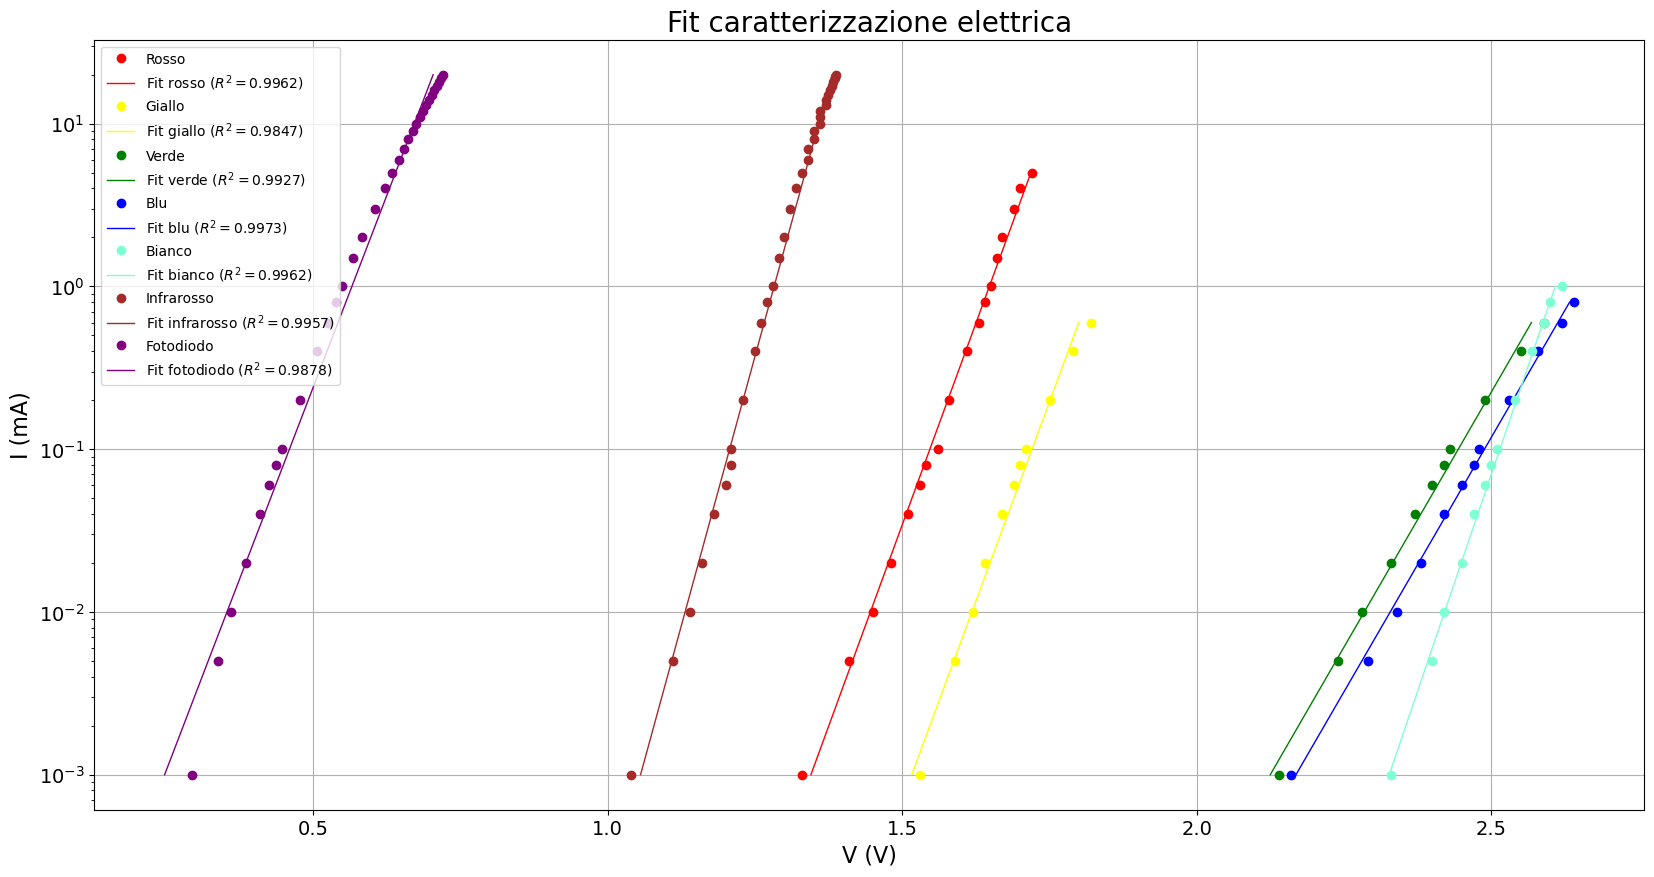

In [239]:
# In questa cella si procede al plot dei dati
fig, ax1 = plt.subplots(1, 1, figsize=[20,10])
ax1.set_yscale("log")
ax1.set_title('Fit caratterizzazione elettrica', size=titlefontsize)

ax1.plot(V_red[:exp_range_dict["red"]], I[:exp_range_dict["red"]], 'o', markersize=markersize, linewidth=linewidth, color='red', label="Rosso")
ax1.plot(inv(I[:exp_range_dict["red"]]/1000, results_dict["red"][0], results_dict["red"][2]), I[:exp_range_dict["red"]], linewidth=linewidth, color='red', label="Fit rosso ($R^2=${:.4f})".format(results_dict["red"][4]))

ax1.plot(V_yellow[:exp_range_dict["yellow"]], I[:exp_range_dict["yellow"]], 'o', markersize=markersize, linewidth=linewidth, color='yellow', label="Giallo")
ax1.plot(inv(I[:exp_range_dict["yellow"]]/1000, results_dict["yellow"][0], results_dict["yellow"][2]), I[:exp_range_dict["yellow"]], linewidth=linewidth, color='yellow', label="Fit giallo ($R^2=${:.4f})".format(results_dict["yellow"][4]))

ax1.plot(V_green[:exp_range_dict["green"]], I[:exp_range_dict["green"]], 'o', markersize=markersize, linewidth=linewidth, color='green', label="Verde")
ax1.plot(inv(I[:exp_range_dict["green"]]/1000, results_dict["green"][0], results_dict["green"][2]), I[:exp_range_dict["green"]], linewidth=linewidth, color='green', label="Fit verde ($R^2=${:.4f})".format(results_dict["green"][4]))

ax1.plot(V_blue[:exp_range_dict["blue"]], I[:exp_range_dict["blue"]], 'o', markersize=markersize, linewidth=linewidth, color='blue', label="Blu")
ax1.plot(inv(I[:exp_range_dict["blue"]]/1000, results_dict["blue"][0], results_dict["blue"][2]), I[:exp_range_dict["blue"]], linewidth=linewidth, color='blue', label="Fit blu ($R^2=${:.4f})".format(results_dict["blue"][4]))

ax1.plot(V_white[:exp_range_dict["white"]], I[:exp_range_dict["white"]], 'o', markersize=markersize, linewidth=linewidth, color='aquamarine', label="Bianco")
ax1.plot(inv(I[:exp_range_dict["white"]]/1000, results_dict["white"][0], results_dict["white"][2]), I[:exp_range_dict["white"]], linewidth=linewidth, color='aquamarine', label="Fit bianco ($R^2=${:.4f})".format(results_dict["white"][4]))

ax1.plot(V_infr[:exp_range_dict["infr"]], I[:exp_range_dict["infr"]], 'o', markersize=markersize, linewidth=linewidth, color='brown', label="Infrarosso")
ax1.plot(inv(I[:exp_range_dict["infr"]]/1000, results_dict["infr"][0], results_dict["infr"][2]), I[:exp_range_dict["infr"]], linewidth=linewidth, color='brown', label="Fit infrarosso ($R^2=${:.4f})".format(results_dict["infr"][4]))

ax1.plot(V_ph[:exp_range_dict["ph"]], I[:exp_range_dict["ph"]], 'o', markersize=markersize, linewidth=linewidth, color='purple', label="Fotodiodo")
ax1.plot(inv(I[:exp_range_dict["ph"]]/1000, results_dict["ph"][0], results_dict["ph"][2]), I[:exp_range_dict["ph"]], linewidth=linewidth, color='purple', label="Fit fotodiodo ($R^2=${:.4f})".format(results_dict["ph"][4]))

ax1.set_xlabel('V (V)', size=labelfontsize)
ax1.set_ylabel('I (mA)', size=labelfontsize)
ax1.tick_params(labelsize=tickfontsize)
ax1.grid(True)
ax1.legend();

Come si può notare dal grafico, i fit possono ritenersi soddisfacenti (visti anche i buoni valori di $R^2$ ottenuti). Notare che si è usata una rappresentazione semilogaritmica in modo da rendere ben visibili i dati anche per i led che "linearizzano prima", cioè con meno dati che hanno andamento esponenziale.
Dai valori di $I_0$ stampati subito dopo la cella di codice dove si è effettuato il fit, si nota una deviazione standard più alta del normale (la deviazione standard di $n$ invece è soddisfacente): questo può essere dovuto a numerosi fattori, alcuni dei quali possono essere:
* Instabilità del fit non lineare
* Condizioni sperimentali non ideali

Si procede ora con il riportare una tabella riassuntiva contenente i dati fittati per $I_0$ e $n$ e i valori di tensione a cui è stata rilevata la prima accensione della luce.

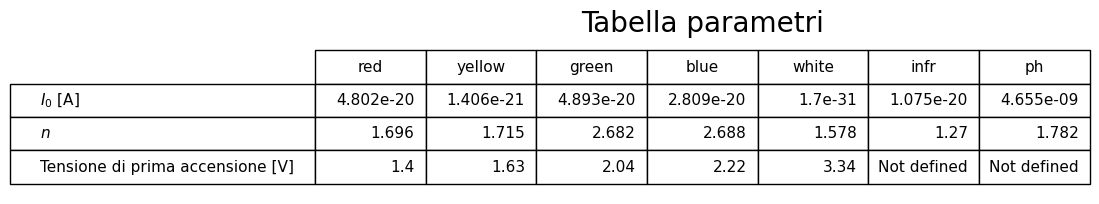

In [304]:
figure = plt.figure(figsize=[10,2])
plt.title("Tabella parametri", size=titlefontsize)
plt.axis('tight')
plt.axis('off')
cols = list(results_dict.keys())
rows = ["$I_0$ [A]", "$n$", "Tensione di prima accensione [V]"]

table_data = [
    ["{:.4g}".format(l[0]) for l in results_dict.values()],
    ["{:.4g}".format(l[2]) for l in results_dict.values()],
    [1.4, 1.63, 2.04, 2.22, 3.34, "Not defined", "Not defined"]
]

table = plt.table(cellText=table_data, rowLabels=rows, colLabels=cols, loc='center')

#table = plt.table(cellText=data.values, rowLabels=rows, colLabels=cols,loc='center')
table.set_fontsize(14)
table.scale(1, 2)


## Parte 2: caratterizzazione ottica dei LED
Per questa parte di esperienza si è montato l'apparato come nell'immagine seguente (fonte: slide di laboratorio), facendo attenzione ad allineare correttamente le lenti e il reticolo di diffrazione.

<br><center><img src="Laboratorio_Fisica_3/Caratterizzazione_elettrica_ottica/img/apparato_caratt_ottica.png" width="750"/></center><br>

In questo apparato si collega il led a un amperometro e il fotodiodo a un voltmetro (si è fatto utilizzo di un piccolo strumento a batterie per invertire la polarizzazione del fotodiodo in modo da garantire una risposta lineare).
Facendo ruotare il braccio con il fotodiodo su un foglio con una scala graduata, si può misurare l'intensità luminosa (data dalla misura di tensione ai capi del fotodiodo) al variare dell'angolo. Essendo però che il reticolo di diffrazione segue la legge di Bragg $$d\sin \vartheta = n\lambda$$ si può far corrispondere a ciascun angolo una determinata lunghezza d'onda. Utilizzando quindi come scala graduata un foglio già provvisto di questa corrispondenza, si può ricavare un grafico di tensione in funzione della lunghezza d'onda per ogni led.

NOTA: per avere la giusta corrispondenza di angolo e lunghezze d'onda, si deve porre il fotodiodo a 39cm dal centro di curvatura del braccio (come indicato nell'immagine), essendo stato così "tarato" il foglio graduato utilizzato in fase di misurazione.

Si procede a riportare di seguito il grafico dei dati ottenuti.

In [281]:
data = pd.read_csv(rad + "data/car_ottica.csv")

print("Dataframe da csv: ")
print(data)
headers = data.keys()

# Creo gli array numpy per l'analisi successiva
lambda_red= data['lambda_red'].to_numpy()
V_red = data['V_red'].to_numpy()
lambda_yellow= data['lambda_yellow'].to_numpy()
V_yellow = data['V_yellow'].to_numpy()
lambda_green= data['lambda_green'].to_numpy()
V_green = data['V_green'].to_numpy()
lambda_blue= data['lambda_blue'].to_numpy()
V_blue = data['V_blue'].to_numpy()
lambda_white= data['lambda_white'].to_numpy()
V_white = data['V_white'].to_numpy()
lambda_infr= data['lambda_infr'].to_numpy()
V_infr = data['V_infr'].to_numpy()

# Dato che le colonne sono di altezze diverse, è necessario rimuovere i dati letti dal csv come "NaN"
lambda_red = lambda_red[~np.isnan(lambda_red)]
V_red = V_red[~np.isnan(V_red)]
lambda_yellow = lambda_yellow[~np.isnan(lambda_yellow)]
V_yellow = V_yellow[~np.isnan(V_yellow)]
lambda_green = lambda_green[~np.isnan(lambda_green)]
V_green = V_green[~np.isnan(V_green)]
lambda_blue = lambda_blue[~np.isnan(lambda_blue)]
V_blue = V_blue[~np.isnan(V_blue)]
lambda_white = lambda_white[~np.isnan(lambda_white)]
V_white = V_white[~np.isnan(V_white)]
lambda_infr = lambda_infr[~np.isnan(lambda_infr)]
V_infr = V_infr[~np.isnan(V_infr)]

Dataframe da csv: 
    lambda_red  V_red  lambda_yellow  V_yellow  lambda_green  V_green  \
0        500.0   0.54          500.0      0.68         400.0     1.00   
1        510.0   0.54          510.0      0.83         410.0     1.20   
2        520.0   0.55          520.0      1.24         420.0     1.65   
3        530.0   0.57          530.0      2.00         430.0     2.53   
4        540.0   0.62          540.0      3.40         440.0     4.27   
5        550.0   0.73          550.0      5.39         450.0     7.18   
6        560.0   0.98          560.0      8.58         460.0    11.67   
7        570.0   1.46          570.0     11.30         470.0    17.78   
8        580.0   2.58          580.0     12.91         480.0    25.20   
9        590.0   4.86          590.0     14.27         490.0    33.20   
10       600.0   9.07          600.0     14.33         500.0    40.70   
11       610.0  15.06          610.0     13.19         510.0    46.90   
12       620.0  22.30          6

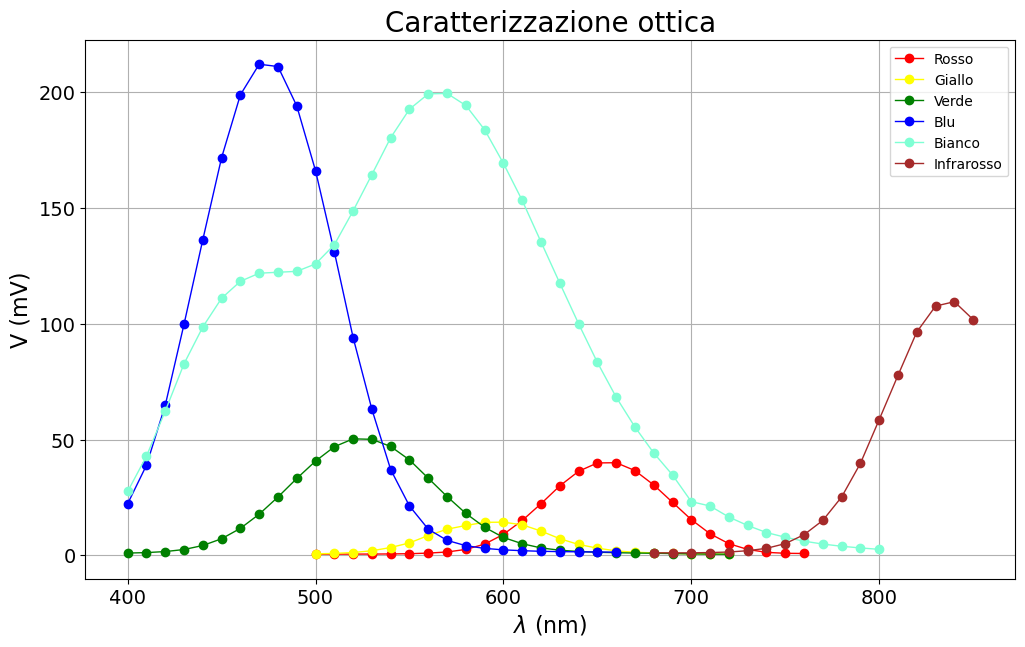

In [282]:
# In questa cella si procede al plot dei dati
fig, ax1 = plt.subplots(1, 1, figsize=[12,7])

ax1.set_title('Caratterizzazione ottica', size=titlefontsize)
ax1.plot(lambda_red, V_red, '-o', markersize=markersize, linewidth=linewidth, color='red', label="Rosso")
ax1.plot(lambda_yellow, V_yellow, '-o', markersize=markersize, linewidth=linewidth, color='yellow', label="Giallo")
ax1.plot(lambda_green, V_green, '-o', markersize=markersize, linewidth=linewidth, color='green', label="Verde")
ax1.plot(lambda_blue, V_blue, '-o', markersize=markersize, linewidth=linewidth, color='blue', label="Blu")
ax1.plot(lambda_white, V_white, '-o', markersize=markersize, linewidth=linewidth, color='aquamarine', label="Bianco")
ax1.plot(lambda_infr, V_infr, '-o', markersize=markersize, linewidth=linewidth, color='brown', label="Infrarosso")
ax1.set_xlabel('$\lambda$ (nm)', size=labelfontsize)
ax1.set_ylabel('V (mV)', size=labelfontsize)
ax1.tick_params(labelsize=tickfontsize)
ax1.grid(True)
ax1.legend();

È facile vedere dal grafico che sono ben definite le lunghezze d'onda di picco. Per ogni led, quindi, si può ricavare l'energia di gap del semiconduttore dalla formula:
$$E_g = h \nu = \frac{hc}{\lambda}$$
Nella prossima cella di codice si procede estrapolando i dati delle lunghezze d'onda di picco, calcolando l'energia di gap e plottando una tabella riassuntiva. Si plotta infine un confronto interessante tra i valori dell'energia di gap e i valori di tensione registrati alla corrente $I$ = 1 mA (nella parte di caratterizzazione elettrica).

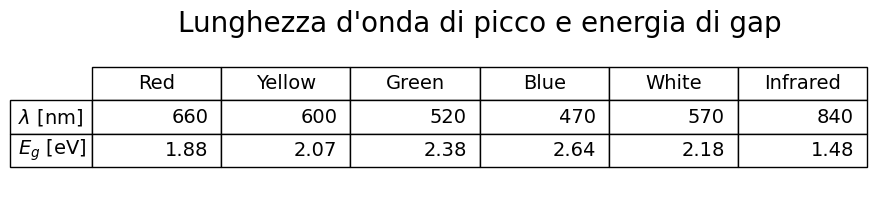

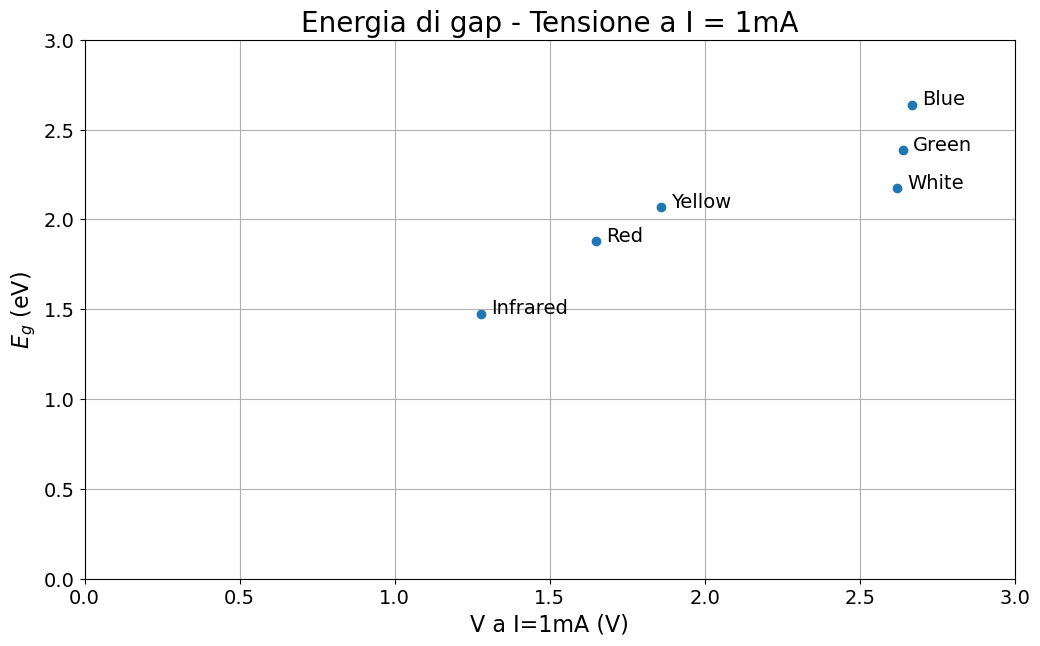

In [330]:
lambda_peak = {
    "Red":lambda_red[V_red.argmax()],
    "Yellow":lambda_yellow[V_yellow.argmax()],
    "Green":lambda_green[V_green.argmax()],
    "Blue":lambda_blue[V_blue.argmax()],
    "White":lambda_white[V_white.argmax()],
    "Infrared":lambda_infr[V_infr.argmax()],
}

# Calcolo dell'energia di gap
# si definiscono dei vettori numpy comodi per svolgere i calcoli al posto che i dizionari
E_gap = dict.fromkeys(lambda_peak.keys())
lambda_peak_nparray = np.array(list(lambda_peak.values()))
# L'energia di gap va espressa in elettronvolt quindi si effettua la conversione
E_gap_nparray = scc.c * scc.h / (lambda_peak_nparray / 1e9) / electron_charge
E_gap.update(zip(E_gap, E_gap_nparray))

# Tabella
figure = plt.figure(figsize=[10,2])
plt.title("Lunghezza d'onda di picco e energia di gap", size=titlefontsize)
plt.axis('tight')
plt.axis('off')
cols = list(lambda_peak.keys())
rows = ["$\lambda$ [nm]", "$E_g$ [eV]"]

# formatto i dati per la tabella con 3 cifre significative
table_data = [
    ["{:.3g}".format(d) for d in lambda_peak.values()],
    ["{:.3g}".format(d) for d in E_gap.values()],
]

table = plt.table(cellText=table_data, rowLabels=rows, colLabels=cols, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

# Per fare il grafico si prendono i dati per I=1mA raccolti nella prima parte di esperienza (togliendo l'ultimo, relativo al fotodiodo)
index, = np.where(I == 1)
V_I1amp = [l[index][0] for l in V_dict.values()][:-1]
# Lista di nomi per le etichette dei punti
names = list(lambda_peak.keys())

fig, ax = plt.subplots(1, 1, figsize=[12,7])
ax.set_title('Energia di gap - Tensione a I = 1mA', size=titlefontsize)
ax.scatter(V_I1amp, E_gap_nparray)
ax.set_xlabel('V a I=1mA (V)', size=labelfontsize)
ax.set_ylabel('$E_g$ (eV)', size=labelfontsize)
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)

# Si applicano infine i nomi ai punti
for i, txt in enumerate(names):
    ax.annotate(txt, (V_I1amp[i], E_gap_nparray[i]), fontsize=14, xytext=(10,0), textcoords="offset pixels")

Da quest'ultimo grafico si osserva che i led analizzati formano due gruppi: bianco, verde e blu con alta energia di gap e alta tensione per corrente di 1 mA (probabilmente costruiti con materiali simili), mentre giallo, rosso e infrarosso con valori più bassi, un po' più sparpagliati.